##  Visualizations of spectra & metamers

In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import load_neugebauer, InkGamut, Neugebauer

In [3]:
trichromat = Observer.trichromat()
tetrachromat = Observer.tetrachromat()

In [4]:
l_cone = Cone.l_cone()
q_cone = Cone.q_cone()
m_cone = Cone.m_cone()
s_cone = Cone.s_cone()

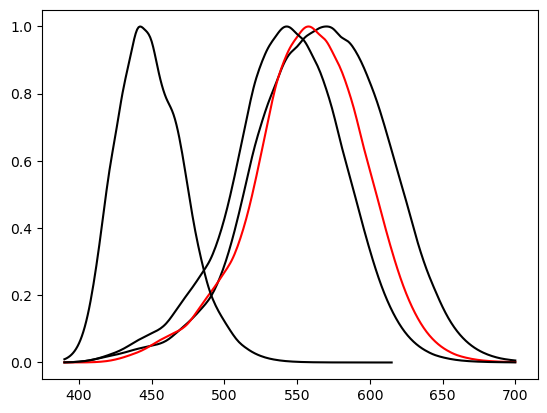

In [5]:
fig, axb = plt.subplots()
l_cone.plot(color='black',ax=axb)
q_cone.plot(color='red', ax=axb)
m_cone.plot(color='black', ax=axb)
s_cone.plot(color='black',ax=axb)
# fig.savefig("lqms.png", transparent=True)
plt.show()

## Trichromat Metamers

In [6]:
cmy_primaries_dict = {}
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra

In [7]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [8]:
paper = cmy_primaries_dict["000"]
cyan = cmy_primaries_dict["100"]
magenta = cmy_primaries_dict["010"]
yellow = cmy_primaries_dict["001"]

In [9]:
cmy_gamut = InkGamut([cyan, magenta, yellow], paper)
cmy_neugebauer = Neugebauer(cmy_primaries_dict)
cmy_gamut.neugebauer = cmy_neugebauer

In [10]:
cmy_gamut.get_width(tetrachromat, stepsize=0.02, save="cmy")

Generating Point Cloud: 100%|███████| 132651/132651 [00:01<00:00, 102852.40it/s]


Point cloud generated.
Point cloud saved to cmy_point_cloud2.
maximum distance is 0.010187369006915747 with percentages (0.1, 0.04, 0.96) and (0.1, 0.02, 0.98)


0.010187369006915747

In [11]:
a = cmy_gamut.get_spectra([1, 0, 0.4])
b = cmy_gamut.get_spectra([0, 0.9, 0.2])

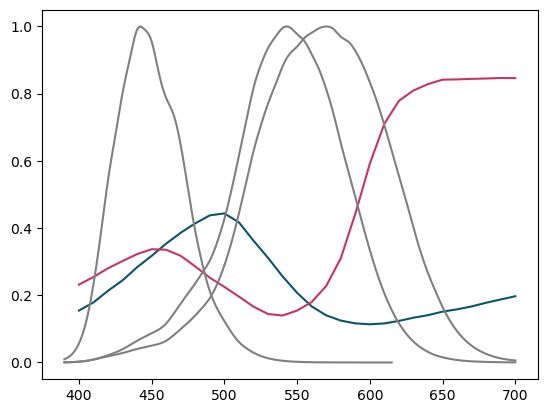

In [12]:
a.plot()
b.plot()
l_cone.plot(color='grey')
m_cone.plot(color='grey')
s_cone.plot(color='grey')
plt.savefig('dichromat_metamers.png', transparent=True)
plt.show()

In [ ]:
a.to_rgb() * 256

## Optimal CMY

In [13]:
wavelengths0 = np.arange(390, 831, 1)

In [14]:
np.save("epson_cyan", cyan.data())
np.save("epson_magenta", magenta.data())
np.save("epson_yellow", yellow.data())

In [16]:
c_data, m_data, y_data = np.load("cmy-theoretical.npy")
optimal_c = Spectra(wavelengths=wavelengths0, data=c_data)
optimal_m = Spectra(wavelengths=wavelengths0, data=m_data)
optimal_y = Spectra(wavelengths=wavelengths0, data=y_data)

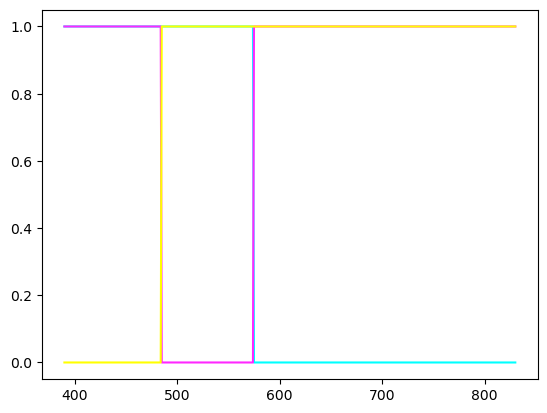

In [17]:
optimal_c.plot()
optimal_m.plot()
optimal_y.plot()

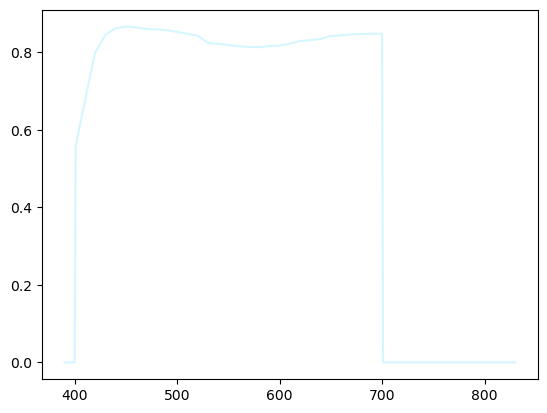

In [18]:
paper.interpolate_values(wavelengths0).plot()

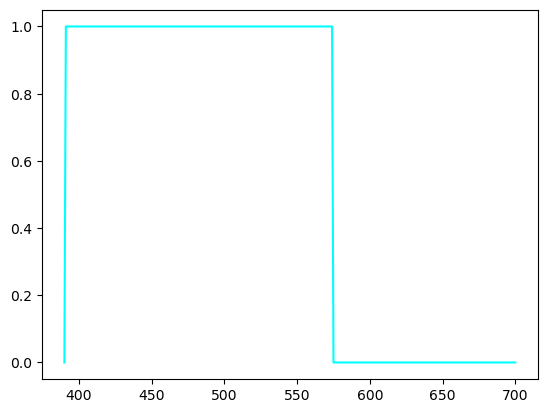

In [19]:
optimal_c.interpolate_values(wavelengths1).plot()

In [20]:
optimal_cmy = InkGamut([
    optimal_c.interpolate_values(wavelengths1),
    optimal_m.interpolate_values(wavelengths1),
    optimal_y.interpolate_values(wavelengths1)
], paper.interpolate_values(wavelengths1))

In [ ]:
optimal_cmy.get_width(trichromat, stepsize=0.02, save="optimal_cmy")

Generating Point Cloud: 100%|████████| 132651/132651 [00:01<00:00, 82241.29it/s]


## Optimal Tetra Metamers

In [ ]:
optimal_pigments = np.load("optimal_pigments.npy")

In [ ]:
optimal_spectras = []
for pigment in optimal_pigments:
    spectra = Spectra(data=np.clip(pigment, 0.01, 1), wavelengths=wavelengths1)
    spectra.plot()
    optimal_spectras.append(spectra.interpolate_values(wavelengths10))

In [ ]:
optimal_pigment_gamut = InkGamut(optimal_spectras, paper)

In [ ]:
optimal_pigment_gamut.get_width(tetrachromat)

In [ ]:
optimal_pigment_gamut.get_spectra([0.1, 0.6, 0, 0]).plot(color='red')
optimal_pigment_gamut.get_spectra([1, 0, 0.7, 0]).plot()
l_cone.plot(color='grey')
m_cone.plot(color='grey')
s_cone.plot(color='grey')
q_cone.plot(color='grey')

plt.savefig("trichromat_metamers.png", transparent=True)

## Fountain Inks

In [ ]:
import csv

fountain_inks = {}
fig, axc = plt.subplots()
with open(f'Inks.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            spectra.plot(ax=axc)
            
            fountain_inks[name] = spectra
            
plt.show()

In [ ]:
cmy_peach_platinum_gamut = InkGamut(
    [
    cyan,magenta,yellow,
    fountain_inks['Platinum violet'], 
    fountain_inks["Peach haze D"],  
    ], paper)

In [ ]:
# cmy_peach_platinum_gamut.get_width(tetrachromat, save="cmy_platinum_peach", stepsize=0.02)